<a href="https://colab.research.google.com/github/kaylixe/Exploring_Fatal_Police_Shootings/blob/master/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import math
import numpy as np

**Problem 1: A Detailed View to MNIST Classification [5 points]**
1. Train a fully-connected net for MNIST classification (sorry , no CNNplease, yet). It should be with 5 hidden layers each of which is with 1024 hidden units. Feel free to use whatever techniques you learned in class. You should be able to get the test accuracy above 98%

2. MNIST dataset can be loaded by using an API in TF:

    from tensorflow.examples.tutorials.mnist import input_data
    
    mnist = input_data.read_data_sets(‘MNIST_data’, one_hot=True)

In [0]:
# Import mnist dataset

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
n_input = 784   # input layer (28x28 pixels)
n_hidden_1 = 1024 # 1st hidden layer
n_hidden_2 = 1024 # 2st hidden layer
n_hidden_3 = 1024 # 3nd hidden layer
n_hidden_4 = 1024 # 4rd hidden layer
n_hidden_5 = 1024 # 5rd hidden layer
n_output = 10 

In [0]:
# We are going to run batches of 200 samples

In [0]:
n_iterations =2000
batch_size = 200
learning_rate = 0.005

In [0]:
# Declare placeholders for varibles

In [0]:
X = tf.placeholder(tf.float32, [None, 784])
Y_ = tf.placeholder(tf.float32, [None, 10])
lr = tf.placeholder(tf.float32)
drop = tf.placeholder(tf.float32)
step = tf.placeholder(tf.int32)

In [0]:
# This will initialize all weights for specific layers

In [7]:
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev=0.1)),
    'w4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4], stddev=0.1)),
    'w5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden_5, n_output], stddev=0.1)),
}

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# This dictionary will also hold values for bias values

In [0]:
biases = {
    'b1': tf.Variable(tf.ones([n_hidden_1])),
    'b2': tf.Variable(tf.ones([n_hidden_2])),
    'b3': tf.Variable(tf.ones([n_hidden_3])),
    'b4': tf.Variable(tf.ones([n_hidden_4])),
    'b5': tf.Variable(tf.ones([n_hidden_5])),
    'out': tf.Variable(tf.zeros([n_output]))
}

In [0]:
# Create a fully connected DNN

In [9]:
# The model, with dropout at each layer
XX = tf.reshape(X, [-1, 784])

Y1 = tf.nn.relu(tf.matmul(XX, weights["w1"]) + biases["b1"])
layer_1 = tf.nn.dropout(Y1, drop)

Y2 = tf.nn.relu(tf.matmul(layer_1, weights["w2"]) + biases["b2"])
layer_2 = tf.nn.dropout(Y2, drop)

Y3 = tf.nn.relu(tf.matmul(layer_2, weights["w3"]) + biases["b3"])
layer_3 = tf.nn.dropout(Y3, drop)

Y4 = tf.nn.relu(tf.matmul(layer_3, weights["w4"]) + biases["b4"])
layer_4 = tf.nn.dropout(Y4, drop)

Y5 = tf.nn.relu(tf.matmul(layer_4, weights["w5"]) + biases["b5"])
layer_5 = tf.nn.dropout(Y4, drop)

Ylogits = tf.matmul(layer_5, weights["out"]) + biases["out"]

Y = tf.nn.softmax(Ylogits)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Compute the cross entropy loss

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# Determine the accuracy on trained values
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
# Use exponential decay learning rate
lr = 0.0001 +  tf.train.exponential_decay(learning_rate, step, 2000, 1/math.e)
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [13]:
for i in range(n_iterations):
  batch_X, batch_Y = mnist.train.next_batch(batch_size, shuffle=True)
  train_data={X:batch_X, Y_:batch_Y,drop:0.96,step:0.5}
  sess.run(train_step,feed_dict=train_data)
  a,c = sess.run([accuracy,cross_entropy],feed_dict=train_data)
  
  if i %100 ==0: 
    out ='Iteration: {:04d} \t|\tAccuracy: {:1.2f}\t|\tLoss: {:1.2f}'.format(i, a,c)
    print(out)

Iteration: 0000 	|	Accuracy: 0.16	|	Loss: 49612.43
Iteration: 0100 	|	Accuracy: 0.87	|	Loss: 42.45
Iteration: 0200 	|	Accuracy: 0.93	|	Loss: 19.81
Iteration: 0300 	|	Accuracy: 0.95	|	Loss: 19.63
Iteration: 0400 	|	Accuracy: 0.96	|	Loss: 17.37
Iteration: 0500 	|	Accuracy: 0.95	|	Loss: 15.01
Iteration: 0600 	|	Accuracy: 0.96	|	Loss: 11.98
Iteration: 0700 	|	Accuracy: 0.95	|	Loss: 17.58
Iteration: 0800 	|	Accuracy: 0.98	|	Loss: 12.82
Iteration: 0900 	|	Accuracy: 0.96	|	Loss: 10.48
Iteration: 1000 	|	Accuracy: 0.97	|	Loss: 15.22
Iteration: 1100 	|	Accuracy: 0.97	|	Loss: 9.61
Iteration: 1200 	|	Accuracy: 0.98	|	Loss: 6.74
Iteration: 1300 	|	Accuracy: 0.97	|	Loss: 8.00
Iteration: 1400 	|	Accuracy: 0.99	|	Loss: 3.55
Iteration: 1500 	|	Accuracy: 0.99	|	Loss: 4.75
Iteration: 1600 	|	Accuracy: 0.98	|	Loss: 8.75
Iteration: 1700 	|	Accuracy: 1.00	|	Loss: 0.92
Iteration: 1800 	|	Accuracy: 0.98	|	Loss: 9.56
Iteration: 1900 	|	Accuracy: 0.98	|	Loss: 8.73


In [0]:
# The output above shows the accuracy and loss output of the trained results

3. Once you’re done with training, as a starter, do a feedforward step on your test samples, a thousand of them. Capture the output of the softmax layer, which will be a 10-dim probability vector per sample. In other words, each output dimension has 1,000 predictions corresponding to the 1,000 examples. For each 10-d output vector, find the dim with the maximum probability (which will eventually decide the class label). Plot the input image associated with that in a grid of subplots. For example, you can create a 10 × 10 grid of subplots, whose first row plots first ten input images that produced the highest probabilities for the first dim (which corresponds to “0”). Eventually, if your classification was near perfect, you’ll see ten 0’s in the first row, ten 1’s in the second, and so on.

In [0]:
# Create a test dataset of 1000 samples

In [0]:
x_test_data=mnist.test.images[:1000,:784]
y_test_data = mnist.test.labels[:1000,:784]
test_data = {X:x_test_data,Y_:y_test_data,drop:0.95,step:0.5}

In [0]:
# Compute accuracy on test samples

In [15]:
test_accuracy = sess.run(accuracy, feed_dict=test_data)
print("\nAccuracy on test set:", np.round(test_accuracy,3))


Accuracy on test set: 0.962


In [0]:
# Compute prediction on test sample

In [0]:
prediction = sess.run(tf.argmax(Y,1),feed_dict=test_data)

In [0]:
# This functions is used to compute the indexes of the sorted predictions

In [0]:
def get_digit_positions(prediction):
  sorted_array=np.argsort(prediction)
  sorted_pred=prediction[sorted_array]
  digits, indexes = [],[]
  for index, digit in zip(sorted_array,sorted_pred):
    for i in range(10):
      if i == digit:
        indexes.append([])
        indexes[i].append(index)
  return indexes

In [0]:
# This function is used to compute first ten digits of each dimension

In [0]:
def get_sorted_array(indexes):
  first_ten_sorted = []
  for x in range(10):
    #first_ten_sorted.append([])
    first_ten_sorted.append(indexes[x][:10])
  return first_ten_sorted

In [0]:
indexes = get_digit_positions(prediction)
first_ten = get_sorted_array(indexes)

In [0]:
# Array positions of the sorted predictions are as shown

In [20]:
first_ten

[[884, 586, 804, 194, 592, 424, 597, 972, 608, 611],
 [455, 835, 489, 154, 836, 272, 476, 480, 180, 473],
 [775, 653, 293, 888, 306, 715, 318, 326, 731, 298],
 [515, 142, 865, 412, 173, 44, 819, 32, 408, 674],
 [109, 670, 789, 784, 668, 757, 139, 511, 829, 103],
 [347, 317, 478, 319, 253, 509, 356, 8, 352, 240],
 [729, 769, 724, 665, 680, 22, 54, 21, 989, 737],
 [917, 911, 909, 898, 771, 950, 880, 756, 946, 832],
 [738, 872, 429, 431, 242, 864, 128, 226, 232, 134],
 [214, 9, 209, 212, 58, 16, 12, 206, 20, 7]]

In [0]:
# The predicted digits are as follows 

In [21]:
prediction[np.asarray(first_ten)]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [0]:
flat_first_ten=np.asarray(first_ten).flatten()

In [0]:
# Plot the input images for the test sample using the sorted predicted positions

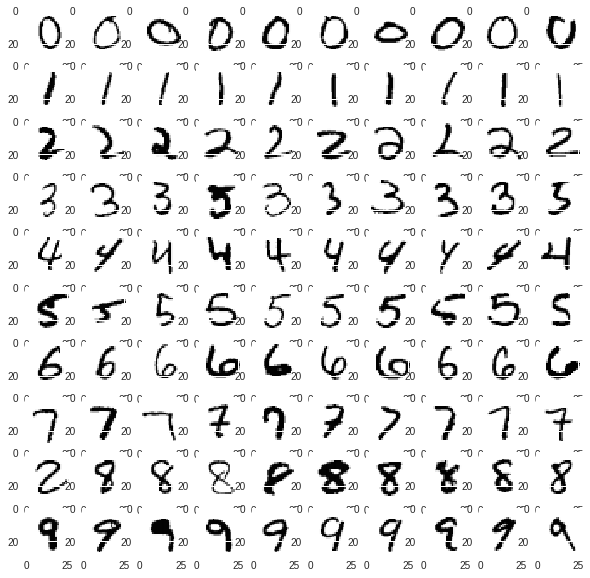

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(figsize=(10, 10))
x=0
for z in flat_first_ten:
  x = x+1
  plt.subplot(10, 10, x)
  plt.imshow((x_test_data[z].reshape(28, 28)))

In [0]:
# OBSERVATION : The classifier was near perfect looking at the plot above. Majority of the digits were correctly predicted though some improvements can be made

4. Repeat the procedure in Problem 1.3 for your second to the last layer output. This time, you should have 1024-dim vector per sample. Choose 10 random dimensions of interest and repeat the procedure in 1.3 as if the 10 out of 1024 dimensions are your output vectors. Note that there can be some dimensions that are with less than 10 images associated, because they are not popular. In your 10 × 10 grid, now there must be some rows that are not with enough number of images or even an empty rows. Explain your observation compared with the results from 1.3. What can you see? What would have been the ideal situation for this second-to- the-last layer? Feel free to investigate the other layers if you want, but I wouldn’t care because we have a better way.

In [0]:
prediction = sess.run(tf.argmax(Y5,1),feed_dict=test_data)

In [0]:
indexes = get_digit_positions(prediction)
first_ten = get_sorted_array(indexes)

In [26]:
first_ten

[[579, 414, 209, 78, 521, 80, 954, 471, 108, 733],
 [],
 [343, 334, 408, 382, 231, 782],
 [700, 988, 772, 31, 735, 279, 696],
 [],
 [],
 [960, 301, 617, 144],
 [],
 [],
 []]

In [0]:
# OBSERVATION : Some dimentsions came out empty while some were did not have 10 images

In [0]:
#For the sake of plotting, we remove the empty images and compute the non-empty ones
list2 = [x for x in first_ten if x != []]

In [45]:
list2

[[579, 414, 209, 78, 521, 80, 954, 471, 108, 733],
 [343, 334, 408, 382, 231, 782],
 [700, 988, 772, 31, 735, 279, 696],
 [960, 301, 617, 144]]

In [0]:
flat_first_ten=np.asarray(list2).flatten()

In [47]:
flat_first_ten

array([list([579, 414, 209, 78, 521, 80, 954, 471, 108, 733]),
       list([343, 334, 408, 382, 231, 782]),
       list([700, 988, 772, 31, 735, 279, 696]),
       list([960, 301, 617, 144])], dtype=object)

In [0]:
flat=np.concatenate(flat_first_ten)

In [57]:
flat

array([579, 414, 209,  78, 521,  80, 954, 471, 108, 733, 343, 334, 408,
       382, 231, 782, 700, 988, 772,  31, 735, 279, 696, 960, 301, 617,
       144])

In [49]:
prediction[np.concatenate(flat_first_ten)]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 6, 6, 6, 6])

In [0]:
# Plot the images

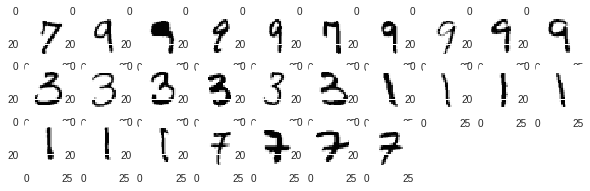

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(figsize=(10, 10))
x=0
for z in flat:
  x = x+1
  plt.subplot(10, 10, x)
  plt.imshow((x_test_data[z].reshape(28, 28)))

In [0]:
# OBSERVATION : As mentioned, some of the images came empty. Some of the images were also not correctly classified when compared to the predictions.
# This can be attributed to the fact that the layers are not complete and fully connected.

5. t-Stochastic Neighbor Embedding (tSNE) or Principal Component Anal- ysis (PCA) are useful tools to reduce the dimension of your data and visualize. By using them, you can reduce the dimension of your data, for example, down to 2D space, so that you can scatter plot your data samples. Feel free to use whatever implementation you can find for tSNE and PCA. I’d use the one in scikit-learn.

## Dimensionality Reduction with PCA

In [0]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Create a dataframe for the PCA

In [0]:
train_df =mnist.train.images
test_df = mnist.test.images
train_df = pd.DataFrame(train_df)
test_df = pd.DataFrame(test_df)
train_y = pd.DataFrame(mnist.train.labels)
test_y = pd.DataFrame(mnist.test.labels)

In [0]:
frames = [train_df,test_df]
full_df =pd.concat(frames)
fram = [ train_y,test_y]
full_y = pd.concat(fram)

In [0]:
a=np.argmax(mnist.train.labels,axis=1)
b=np.argmax(mnist.test.labels,axis=1)
a=pd.DataFrame(a)
b=pd.DataFrame(b)
c= [a,b]
d=pd.concat(c)

In [0]:
feat_cols = [ 'pixel'+str(i) for i in range(full_df.shape[1]) ]
full_df.columns = feat_cols
full_df["label"] = d
full_df['label'] = full_df['label'].apply(lambda i: str(i))

In [0]:
# Select a 1000 samples from the dataframe

In [0]:
full_df =full_df.sample(1000,random_state=10)

In [0]:
# Create PCA and transform the dataset

In [0]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(full_df.values)

In [35]:
print('Explained variance per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variance per principal component: [0.17081838 0.08946144]


In [0]:
# Add the reduced dimensions into the dataframe

In [0]:
full_df['pca-one'] = pca_result[:,0]
full_df['pca-two'] = pca_result[:,1] 

In [0]:
# Install ggplot and create a plot of the PCA

In [0]:
#!pip install ggplot

In [38]:
from ggplot import *

/usr/local/lib/python3.6/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

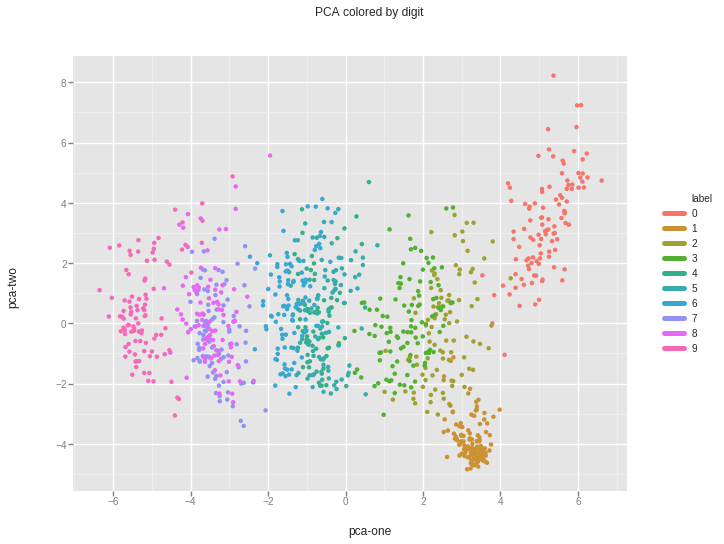

<ggplot: (-9223363287980307880)>

In [42]:
chart = ggplot( full_df, aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=20,alpha=1) \
        + ggtitle("PCA colored by digit")
chart

In [0]:
# OBSERVATION : The digits look clustered in groups even though they are not neatly separated. 
#PCA reduced the number of dimensions while maintaining the information of each feature.

## Dimensionality Reduction With T-SNE

In [0]:
from sklearn.manifold import TSNE
import time

In [0]:
# Create T-SNE with 2 components and tranform the dataframe 

In [47]:
start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(full_df.values)
print('Time elapsed: {} Seconds'.format((time.time()-start)))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.018s...
[t-SNE] Computed neighbors for 1000 samples in 1.440s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.181198
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.057682
[t-SNE] KL divergence after 300 iterations: 0.783648
Time elapsed: 4.15885853767395 Seconds


In [0]:
# OBSERVATION : T-SNE takes long to execute compared to PCA. A small sample of the dataset helps prevent running into CPU and memory issues. 

In [0]:
full_df['tsne-one'] = tsne_results[:,0]
full_df['tsne-two'] = tsne_results[:,1] 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

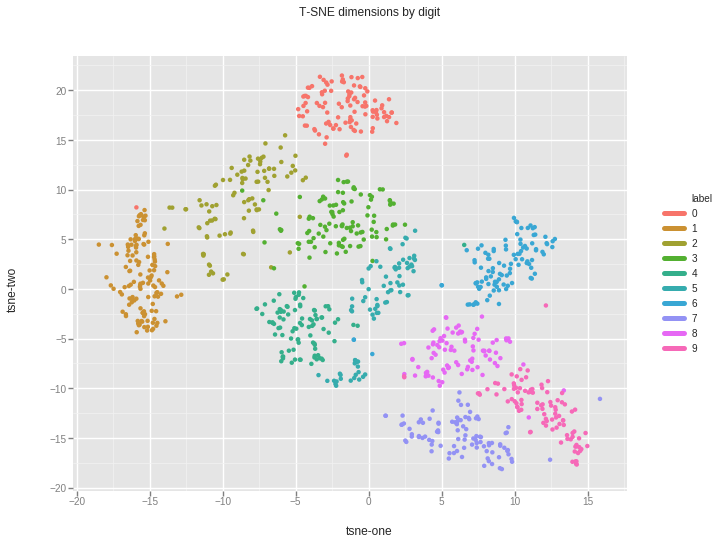

<ggplot: (8748841987946)>

In [55]:
chart = ggplot(full_df, aes(x='tsne-one', y='tsne-two', color='label') ) \
        + geom_point(size=20,alpha=1) \
        + ggtitle("T-SNE dimensions by digit")
chart

In [0]:
# T-SNE created better digit clusters compared to PCA. T-SNE is another dimensionality reduction technique that is suited for high dimensionality data. 
# Compared to PCA, it is a probabilistic technique and not a mathematical one. T-SNE also takes a while to run, to avoid runtime issues, a small sample helps get quicker results

6. First, take a thousand test samples from your MNIST dataset. Apply tSNE and PCA on the flattend 784-dim pixels. Now you have 2 × 1000 (or 1000 × 2 if you transposed the data) matrix from each of the dim reduction algorithms. Scatter plot the data samples. USE THE LABELS OF THE DATA SAMPLES SO THAT EACH SET OF SAMPLES FROM THE SAME CLASS ARE REPRESENTED WITH THE SAME COLOR. OVERLAY THE CLASS LABEL ON TOP OF THE MEAN OF THE CLASS. By doing so, you can examine if your data is easy to classify or not. Do you think this raw image samples are easy to classify? For your information I share my scatter plot of the first two classes in Figure 1. It looks easy because there are only two classes, but with all 10 classes the situation will be different. Your plot should be similar to this but with all 10 classes.

## Dimensionality Reduction with PCA -1000 Sample

In [58]:
full_df_sample = full_df
full_df_sample=full_df_sample.iloc[:,-5:]
full_df_sample.head()

,label,pca-one,pca-two,tsne-one,tsne-two
48540,3,0.843130,-1.988892,-6.009325,5.852744
17765,3,-0.172525,-0.658976,-1.566930,3.732246
21638,8,-1.950728,5.568928,2.447549,-8.577057
2579,8,-3.997906,-0.193435,7.067075,-7.340153
17940,6,-1.712279,1.526929,9.691363,2.025819


In [0]:
# The cell below will compute the means of the transformed digits for PCA and T-SNE. These will be stored in a dataframe

In [0]:
center_mean = full_df_sample.groupby('label').mean().reset_index()
center_mean_pca = center_mean[['pca-one','pca-two','label']]
center_mean_tsne = center_mean[['tsne-one','tsne-two','label']]

In [0]:
# A dictionary below will be used to group the individual array dimensions to their digits

In [0]:
the_dict = {}
sample_groups=full_df_sample.groupby('label').groups

In [0]:
for i,v in sample_groups.items():
  the_dict[i]=v.tolist()

In [0]:
# Plot the dimensions and annotate the label relative to the mean of the dimension

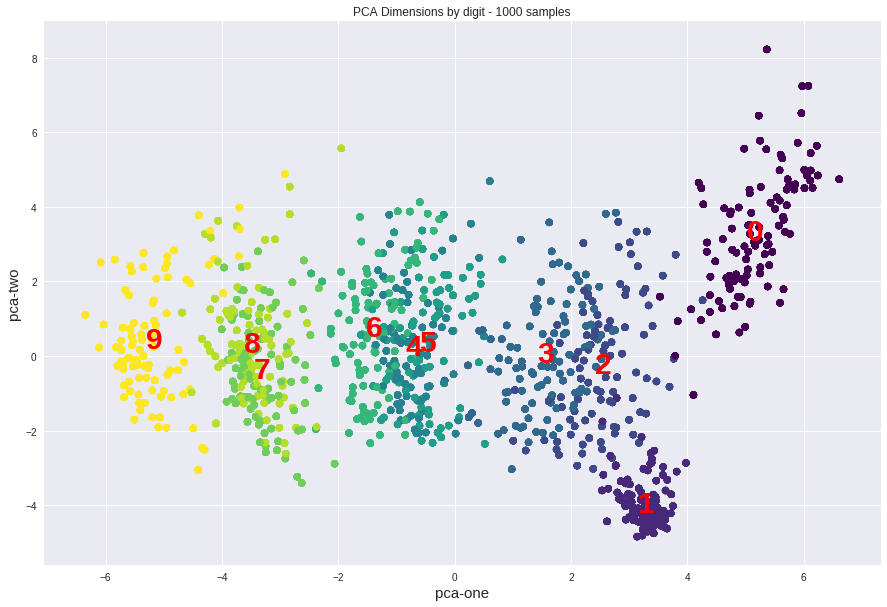

In [64]:
plt.figure(figsize=(15,10))
for label,_ in enumerate(the_dict.keys()):
  plt.scatter(full_df_sample['pca-one'],full_df_sample['pca-two'],c=full_df_sample['label'].astype(int),cmap='viridis')
  plt.annotate(str(label),
               xy=tuple(center_mean_pca[center_mean_pca['label'] ==str(label)][["pca-one","pca-two"]].values.flatten()),
               size=30,weight='bold',horizontalalignment='center',verticalalignment='center',color='red')
  plt.title("PCA Dimensions by digit - 1000 samples")
  plt.xlabel("pca-one",fontsize=15)
  plt.ylabel("pca-two",fontsize=15)

In [0]:
# OBSERVATION : Though the digits appear clustered, they are not very well neatly separated into their individual clusters.
# The annotations show that some dimensions still are overlapping and nto very well separable

## Dimensionality Reduction with T-SNE -1000 Sample

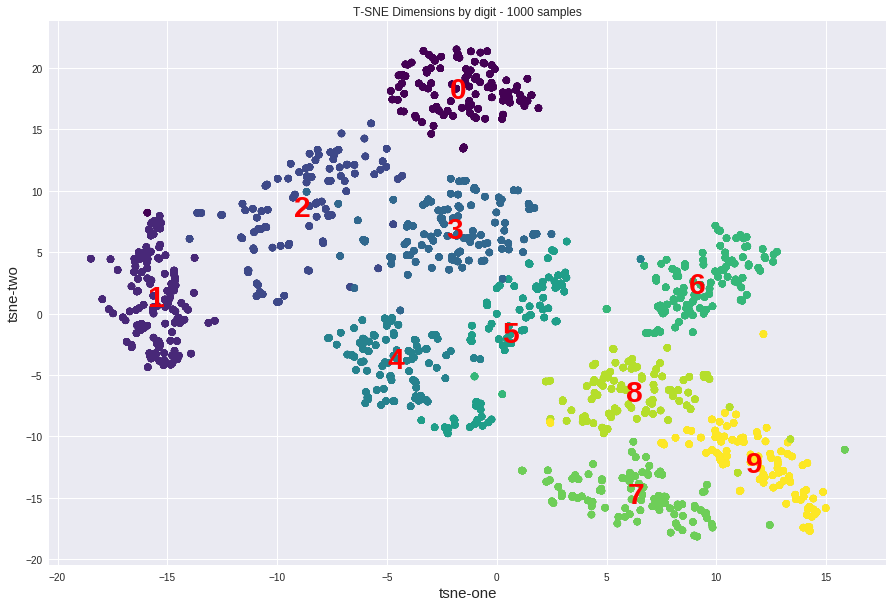

In [65]:
plt.figure(figsize=(15,10))
for label,_ in enumerate(the_dict.keys()):
  plt.scatter(full_df_sample['tsne-one'],full_df_sample['tsne-two'],c=full_df_sample['label'].astype(int),cmap='viridis')
  plt.annotate(str(label),xy=tuple(center_mean_tsne[center_mean_tsne['label'] ==str(label)][["tsne-one","tsne-two"]].values.flatten()),
               size=30,weight='bold',horizontalalignment='center',verticalalignment='center',color='red')
  plt.title("T-SNE Dimensions by digit - 1000 samples")
  plt.xlabel("tsne-one",fontsize=15)
  plt.ylabel("tsne-two",fontsize=15)

In [0]:
# OBSERVATION : An annotated version of T-SNE shows better clustering around the mean. Though this is an improvement from the PCA version, we can still see that some parts are still
#overlapping

7. Do a feedforward using your classifier. Capture the output of your first hidden layer, which will give you 1024 × 1000 matrix. What that means is that you transformed your input data into a 1024-dim space. You may hope that this makes your classification easier. Check it out by doing tSNE and PCA on this matrix, which will once again give you 2 × 1000 matrix. Scatter plot and check out if this layer gives you a better representation in terms of classification.

In [0]:
# Find the output of the second layer - First hidden layer

In [0]:
first_hidden_output=sess.run(Y2,feed_dict=test_data)

In [67]:
first_hidden_output.shape

(1000, 1024)

In [0]:
# Get PCA transformation

In [0]:
pca_first_result = pca.fit_transform(first_hidden_output)

In [70]:
pca_first_result.shape

(1000, 2)

In [0]:
# Get T-SNE transformation

In [72]:
tsne_first_results = tsne.fit_transform(first_hidden_output)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.032s...
[t-SNE] Computed neighbors for 1000 samples in 2.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 4.616131
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.268261
[t-SNE] KL divergence after 300 iterations: 0.676614


In [0]:
# Create DataFrame and store transformed values

In [0]:
first_hidden_df = pd.DataFrame()

In [0]:
first_hidden_df['pca-one'] = pca_first_result[:,0]
first_hidden_df['pca-two'] = pca_first_result[:,1] 
first_hidden_df['tsne-one'] = tsne_first_results[:,0]
first_hidden_df['tsne-two'] = tsne_first_results[:,1]

In [0]:
first_hidden_df['label'] = np.argmax(y_test_data,1)

In [77]:
first_hidden_df.head()

,pca-one,pca-two,tsne-one,tsne-two,label
0,-3.237410,-3.503595,9.434978,9.380070,7
1,7.118726,-6.651405,-8.218131,2.561301,2
2,-6.240634,-4.932912,18.830341,3.586830,1
3,3.645060,-0.706549,-9.645537,-9.162417,0
4,-4.650292,7.309390,-3.413934,14.686560,4


In [0]:
# Compute the means again

In [0]:
center_mean = first_hidden_df.groupby('label').mean().reset_index()
center_mean_pca = center_mean[['pca-one','pca-two','label']]
center_mean_tsne = center_mean[['tsne-one','tsne-two','label']]

### PCA PLOT FOR 1st Hidden Layer

In [0]:
# The cell below will create a scatterplot of the PCA dimensions for the first hidden layer.

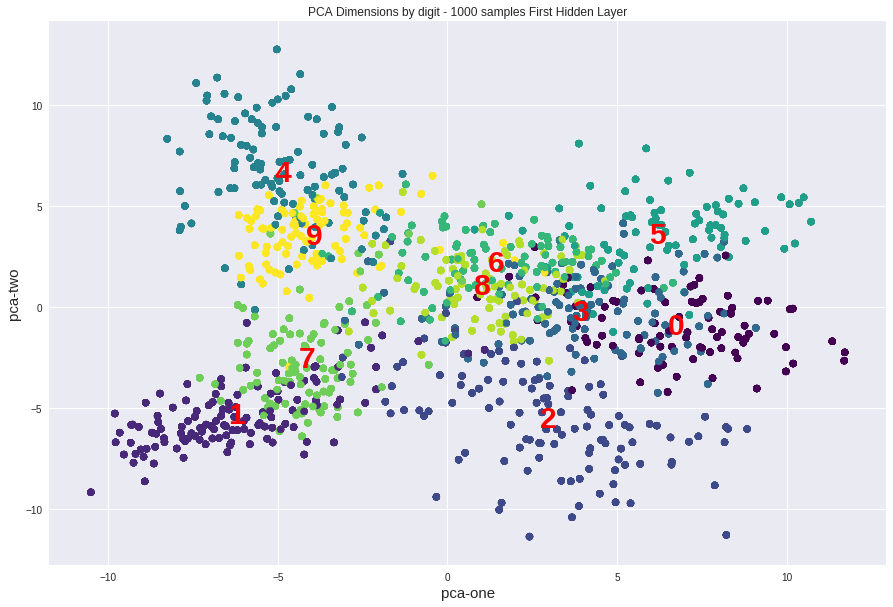

In [79]:
plt.figure(figsize=(15,10))
for label,_ in enumerate(the_dict.keys()):
  plt.scatter(first_hidden_df['pca-one'],first_hidden_df['pca-two'],c=first_hidden_df['label'].astype(int),cmap='viridis')
  plt.annotate(str(label),
               xy=tuple(center_mean_pca[center_mean_pca['label'] ==label][["pca-one","pca-two"]].values.flatten()),
               size=30,weight='bold',horizontalalignment='center',verticalalignment='center',color='red')
  plt.title("PCA Dimensions by digit - 1000 samples First Hidden Layer")
  plt.xlabel("pca-one",fontsize=15)
  plt.ylabel("pca-two",fontsize=15)

In [0]:
# The different groups of digits are not cleanly separated as seen. This is because the input into the hidden layer is not fully transformed into its individual group
# The series of functions applied to the hiddens layers help better tranform the dimensions as they are fed to the output layer

### T-SNE PLOT FOR 1st Hidden Layer

In [0]:
# This plot produces a T-SNE version of the 1 st hidden layer

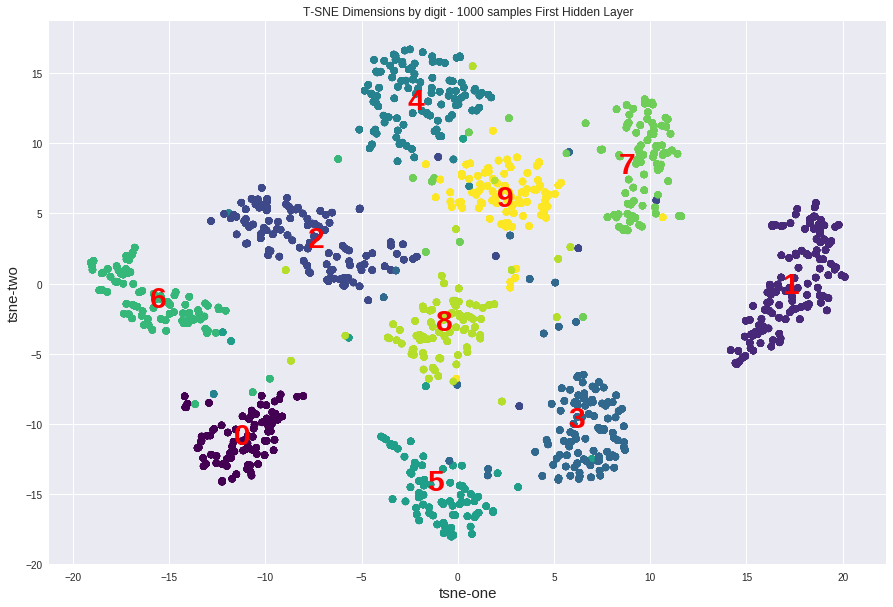

In [80]:
plt.figure(figsize=(15,10))
for label,_ in enumerate(the_dict.keys()):
  plt.scatter(first_hidden_df['tsne-one'],first_hidden_df['tsne-two'],c=first_hidden_df['label'].astype(int),cmap='viridis')
  plt.annotate(str(label),xy=tuple(center_mean_tsne[center_mean_tsne['label'] ==label][["tsne-one","tsne-two"]].values.flatten()),
               size=30,weight='bold',horizontalalignment='center',verticalalignment='center',color='red')
  plt.title("T-SNE Dimensions by digit - 1000 samples First Hidden Layer")
  plt.xlabel("tsne-one",fontsize=15)
  plt.ylabel("tsne-two",fontsize=15)

In [0]:
# Once again, T-SNE outperformed PCA. The digit clusters appear better clustered thought not as clean. The first hidden layer seems to have pretty much done 
# a good job though. With a small error, this can quite sufficiently make digit separations

8. Repeat this procedure for all your layers including the last one. Explain your observation.

In [0]:
full_output=sess.run(Y,feed_dict=test_data)

In [124]:
full_output.shape

(1000, 10)

In [0]:
# Create Tranformations for full DDN

In [126]:
pca_full_result = pca.fit_transform(full_output)
tsne_full_results = tsne.fit_transform(full_output)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000001
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.944149
[t-SNE] KL divergence after 300 iterations: 0.264612


In [0]:
# Put the transformations in a dataframe

In [0]:
full_layers_df = pd.DataFrame()

In [0]:
full_layers_df['pca-one'] = pca_full_result[:,0]
full_layers_df['pca-two'] = pca_full_result[:,1] 
full_layers_df['tsne-one'] = tsne_full_results[:,0]
full_layers_df['tsne-two'] = tsne_full_results[:,1]

In [0]:
full_layers_df['label'] = np.argmax(y_test_data,1)

In [130]:
full_layers_df.head()

,pca-one,pca-two,tsne-one,tsne-two,label
0,-0.069945,-0.188698,-3.876287,-8.416157,7
1,-0.539426,0.737564,0.310465,11.601463,2
2,0.829104,0.386523,-12.020996,-0.635066,1
3,-0.042075,-0.118389,9.554912,-9.558129,0
4,-0.057854,-0.348295,-1.376268,1.404467,4


In [0]:
# Find the mean of the tranformations to determine the center

In [0]:
center_mean = full_layers_df.groupby('label').mean().reset_index()
center_mean_pca = center_mean[['pca-one','pca-two','label']]
center_mean_tsne = center_mean[['tsne-one','tsne-two','label']]

### PCA PLOT FOR Full Layer

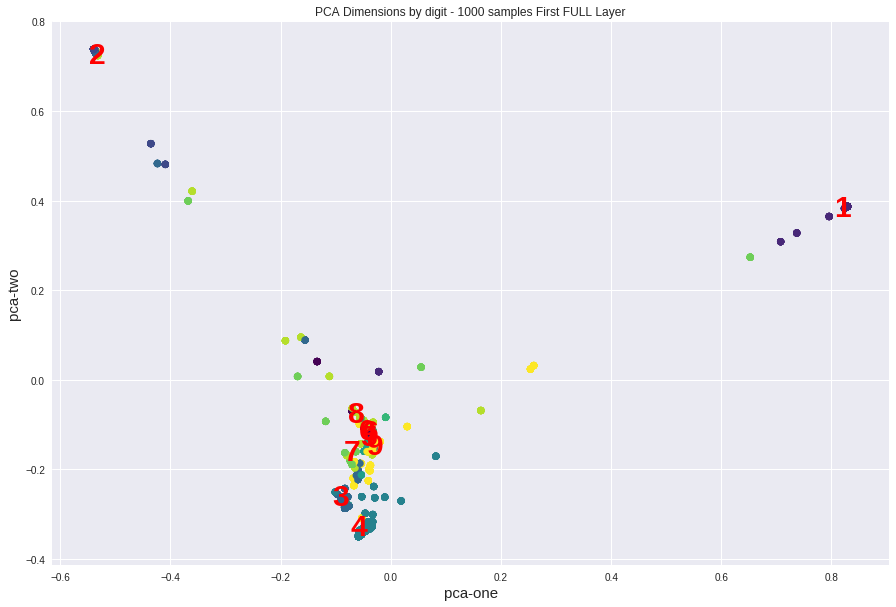

In [132]:
plt.figure(figsize=(15,10))
for label,_ in enumerate(the_dict.keys()):
  plt.scatter(full_layers_df['pca-one'],full_layers_df['pca-two'],c=full_layers_df['label'].astype(int),cmap='viridis')
  plt.annotate(str(label),
               xy=tuple(center_mean_pca[center_mean_pca['label'] ==label][["pca-one","pca-two"]].values.flatten()),
               size=30,weight='bold',horizontalalignment='center',verticalalignment='center',color='red')
  plt.title("PCA Dimensions by digit - 1000 samples First FULL Layer")
  plt.xlabel("pca-one",fontsize=15)
  plt.ylabel("pca-two",fontsize=15)

In [0]:
# For some of the reason PCA did not produce a well clustered plot. PCA might not be the best dimensionality reduction technique for this number of dimensions. Most of the digits
# are clustered around the same area. This could be because the dimensions is already low.

### T-SNE PLOT FOR Full Layer 

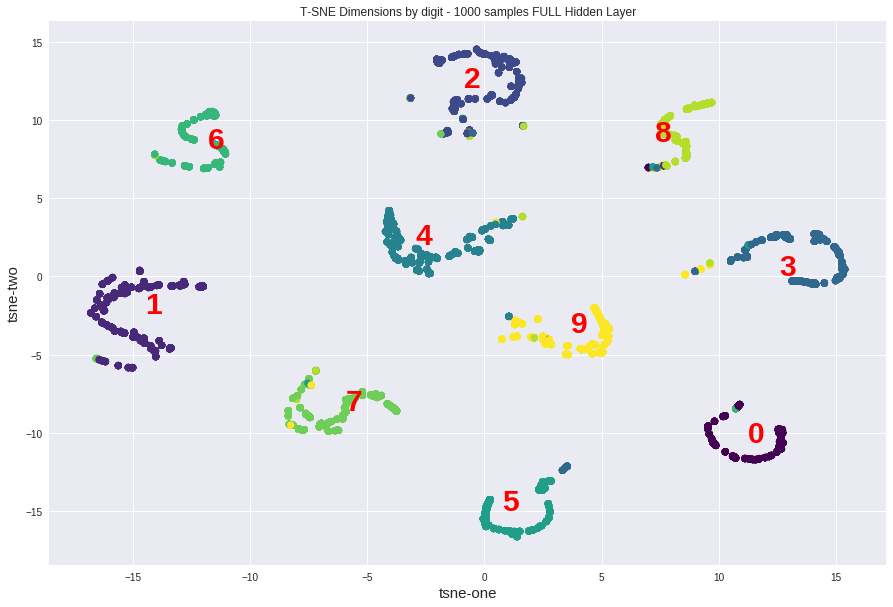

In [133]:
plt.figure(figsize=(15,10))
for label,_ in enumerate(the_dict.keys()):
  plt.scatter(full_layers_df['tsne-one'],full_layers_df['tsne-two'],c=full_layers_df['label'].astype(int),cmap='viridis')
  plt.annotate(str(label),xy=tuple(center_mean_tsne[center_mean_tsne['label'] ==label][["tsne-one","tsne-two"]].values.flatten()),
               size=30,weight='bold',horizontalalignment='center',verticalalignment='center',color='red')
  plt.title("T-SNE Dimensions by digit - 1000 samples FULL Hidden Layer")
  plt.xlabel("tsne-one",fontsize=15)
  plt.ylabel("tsne-two",fontsize=15)

In [0]:
# This is so far the best clustered image of the transformations. There is no more overlap and the digits are neataly separated. 
# However we can still see some a few dots around the wrong groups. An improved accuracy on our classification model would help with this.
# We can conclude that the full layer gives a better classification on the digit dimensions. Also, T-SNE is really good data with high dimensions

**Problem 2: Speech Denoising Using Deep Learning [5 points]**
1. If you took my MLSP class, you may think that you’ve seen this problem. But, it’s actually somewhat different from what you did before, so read carefully. And, this time you SHOULD implement a DNN with at least two hidden layers. So, don’t reuse your legacy MATLAB code for this problem.

2. When you attended IUB, you took a course taught by Prof. K. Since you really liked his lectures, you decided to record them without the professor’s permission. You felt awkward, but you did it anyway because you really wanted to review his lectures later


3. Although you meant to review the lecture every time, it turned out that you never listened to it. After graduation, you realized that a lot of concepts you face at work were actually covered by Prof. K’s class. So, you decided to revisit the lectures and study the materials once again using the recordings.

4. You should have reviewed your recordings earlier. It turned out that a fellow student who used to sit next to you always ate chips in the middle of the class right beside your microphone. So, Prof. K’s beautiful deep voice was contaminated by the annoying chip eating noise.

5. But, you vaguly recall that you learned some things about speech denoising and source separation from Prof. K’s class. So, you decided to build a simple deep learning-based speech denoiser that takes a noisy speech spectrum (speech plus chip eating noise) and then produces a cleaned-up speech spectrum.

6. Since you don’t have Prof. K’s clean speech signal, I prepared this male speech data recorded by other people. *train dirty male.wav* and
*train clean male.wav* are the noisy speech and its corresponding clean speech you are going to use for training the network. Take a listen to them. Load them and covert them into spectrograms, which are the matrix representation of signals. To do so, you’ll need to install librosa and use it by using the following codes:

                        !pip install librosa # in colab, you’ll need to install this
                        import librosa
                        s, sr=librosa.load(‘train_clean_male.wav’, sr=None)
                        S=librosa.stft(s, n_fft=1024, hop_length=512)
                        sn, sr=librosa.load(‘train_dirty_male.wav’, sr=None)
                        X=librosa.stft(sn, n_fft=1024, hop_length=512)
     
which is going to give you two matrices S and X of size 513 × 2459. This procedure is something called Short-Time Fourier Transform.

7. Take their magnitudes by using np.abs() or whatever suitable method, because S and X are complex valued. Let’s call them **|S|** and **|X|.**

8. Train a fully-connected deep neural network. A couple of hidden layers would work, but feel free to try out whatever structure, activation function, initialization scheme you’d like. The input to the network is a column vector of |X| (a 513-dim vector) and the target is its corresponding one in |S|. You may want to do some mini-batching for this. Make use of whatever functions in Tensorflow or Pytorch.

9. But, remember that your network should predict nonnegative magnitudes as output. Try to use a proper activation function in the last layer to make sure of that. I don’t care which activation function you use in the middle layers.

10. test 01 x.wav is the test noisy signal. Load them and apply STFT as before. Feed the magnitude spectra of this test mixture |Xtest| to your network and predict their clean magnitude spectra |Sˆtest|. Then, you can recover the (complex-valued) speech spectrogram of the test signal in this way:

                                     Sˆ= (Xtest/  |X test |)     ⊙ Sˆtest, (1) 
                                       

 which means you take the phase information of the input noisy signal **Xtest / |X test |**  and use that to recover the clean speech. ⊙ stands for the Hadamard product and the division is element-wise, too.

11. Recover the time domain speech signal by applying an inverse-STFT on Sˆtest, which will give you a vector. Let’s call this cleaned-up test speech signal sˆtest. I’ll calculate something called Signal-to-Noise Ratio (SNR) by comparing it with the ground truth speech I didn’t share with you. It should be reasonably good. You can actually write it out by using the following code:

                          librosa.output.write_wav(‘test_s_01_recons.wav’, sh_test, sr)

12. Do the same testing procedure for test 02 x.wav, which actually contains Prof. K’s voice along with the chip eating noise. Enjoy his enhanced voice using your DNN

In [0]:
#!pip install librosa

In [0]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import tensorflow as tf
import math

In [120]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [122]:
!ls /content/drive/data

test_x_01.wav  test_x_02.wav  train_clean_male.wav  train_dirty_male.wav


In [0]:
s, sr=librosa.load('/content/drive/data/train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)

sn, sr=librosa.load('/content/drive/data/train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

In [0]:
Y_train_clean=np.abs(S)
X_train_dirty=np.abs(X)

In [0]:
stest1, srtest1=librosa.load('/content/drive/data/test_x_01.wav', sr=None)
Xtest1=librosa.stft(stest1, n_fft=1024, hop_length=512)

stest2, srtest2=librosa.load('/content/drive/data/test_x_02.wav', sr=None)
Xtest2=librosa.stft(stest2, n_fft=1024, hop_length=512)

In [0]:
Xtest1_abs=np.abs(Xtest1)
Xtest2_abs=np.abs(Xtest2)

In [127]:
X_train_dirty.shape

(513, 2459)

In [0]:
# Plot the waveform

Text(0.5, 1.0, 'Log-frequency Dirty Male power spectrogram')

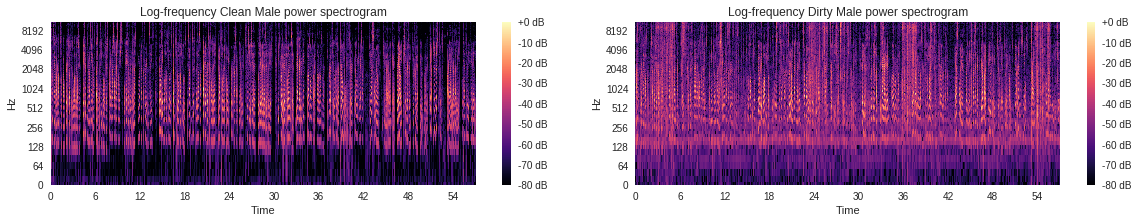

In [129]:
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(Y_train_clean,ref=np.max),y_axis='log',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency Clean Male power spectrogram')
plt.subplots_adjust(wspace = 0.1)
plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(X_train_dirty,ref=np.max),y_axis='log',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency Dirty Male power spectrogram')

In [155]:
X = tf.placeholder(tf.float32, shape=[513, None])
Y = tf.placeholder(tf.float32, shape=[513, None])

initializer = tf.contrib.layers.xavier_initializer()

with tf.name_scope("inference") as scope:
  W1=tf.Variable(initializer([513, 513]))
  b1=tf.Variable(initializer([513, 1]))
  Y_pred = tf.nn.relu(W1@X + b1)
  
with tf.name_scope("loss") as scope:
  loss = tf.losses.mean_squared_error(Y, Y_pred)
  Train_Step = tf.train.AdamOptimizer(learning_rate=.001).minimize(loss)
  
with tf.name_scope("train") as scope:
  sess=tf.InteractiveSession()
  tf.global_variables_initializer().run()
  mean_error=np.zeros(100)
  for i in range(100):
    mean_error[i], _, predict = sess.run([loss, Train_Step, Y_pred], feed_dict={X: X_train_dirty, Y:Y_train_clean})

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [156]:
mean_error

array([0.13667388, 0.12063038, 0.10904612, 0.10061754, 0.09431218,
       0.08943974, 0.08553129, 0.0822866 , 0.079508  , 0.07708507,
       0.07492395, 0.07298534, 0.07122262, 0.06960746, 0.0681239 ,
       0.0667537 , 0.06547142, 0.06425869, 0.06311304, 0.06202473,
       0.06097779, 0.05996958, 0.05899086, 0.05803737, 0.05710671,
       0.05619692, 0.05530844, 0.05444206, 0.05359575, 0.05276769,
       0.05195691, 0.05116415, 0.0503897 , 0.04963123, 0.0488873 ,
       0.04816068, 0.04744928, 0.0467546 , 0.04607882, 0.04542081,
       0.04478213, 0.04416487, 0.04356599, 0.04298124, 0.04241104,
       0.04185785, 0.0413214 , 0.04079878, 0.04029092, 0.03979668,
       0.0393117 , 0.03884184, 0.03838598, 0.03794198, 0.03750648,
       0.03708122, 0.03666628, 0.03626193, 0.03586803, 0.03548394,
       0.03510904, 0.03474273, 0.03438503, 0.03403573, 0.03369543,
       0.03336392, 0.03304105, 0.03272635, 0.03241977, 0.03212056,
       0.03182843, 0.03154293, 0.03126375, 0.03099038, 0.03072

In [0]:
Y_test = sess.run(Y_pred, feed_dict={X:Xtest1_abs})

In [0]:
y_div =tf.math.divide(Xtest1,Xtest1_abs)

In [0]:
stft_test =y_div * Y_test

In [0]:
g=librosa.core.istft(stft_test,win_length=1024,hop_length=513)

In [0]:
librosa.output.write_wav('test_s_01_recons.wav', g, sr)

In [0]:
from IPython.display import Audio

In [0]:
framerate = 44100
sound = '/content/drive/data/test_s_01_recons.wav'

In [0]:
# The speech produced embedded in the clip below. The Sound is be fined some more with better processing techniques

In [158]:
Audio(sound)